Welcome to our World Cup Prediction Model for the 2022 Edition of the FIFA World Cup, Qatar. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [ ]:
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,3.0


In [ ]:
df = results[(results['home_team'] == 'Argentina') | (results['away_team'] == 'Argentina')]
argentina = df.iloc[:]
argentina.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
145,1902-07-20,Uruguay,Argentina,0.0,6.0,Friendly,Montevideo,Uruguay,False,Argentina,6.0
155,1903-09-13,Argentina,Uruguay,2.0,3.0,Friendly,Buenos Aires,Argentina,False,Uruguay,1.0
177,1905-08-15,Argentina,Uruguay,0.0,0.0,Copa Lipton,Buenos Aires,Argentina,False,Draw,0.0
188,1906-08-15,Uruguay,Argentina,0.0,2.0,Copa Lipton,Montevideo,Uruguay,False,Argentina,2.0
190,1906-10-21,Argentina,Uruguay,2.0,1.0,Copa Newton,Buenos Aires,Argentina,False,Argentina,1.0


In [ ]:
year = []
for row in argentina['date']:
    year.append(int(row[:4]))
argentina ['match_year']= year
argentina_1930 = argentina[argentina.match_year >= 1930]
argentina_1930.count()

date               867
home_team          867
away_team          867
home_score         867
away_score         867
tournament         867
city               867
country            867
neutral            867
winning_team       867
goal_difference    867
match_year         867
dtype: int64

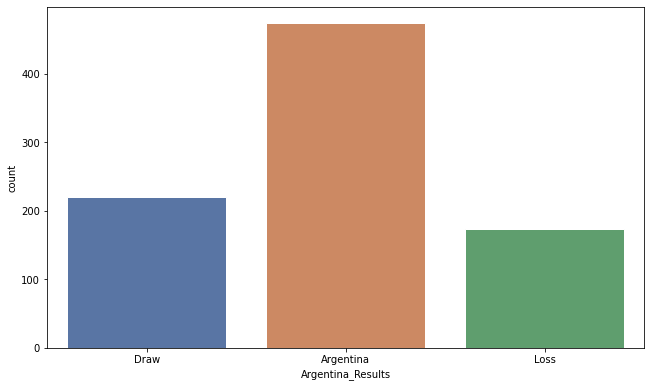

In [ ]:
wins = []
for row in argentina_1930['winning_team']:
    if row != 'Argentina' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'Argentina_Results'])

fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Argentina_Results', data=winsdf)

In [ ]:
worldcup_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 
                  'IR Iran', 'USA', 'Wales',  'Argentina', 'Saudi Arabia',
                  'Mexico', 'Poland', 'France', 'Australia', 'Denmark', 
                  'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 
                  'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia',
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay',
                  'South Korea']
                  
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               21510
home_team          21510
away_team          21510
home_score         21510
away_score         21510
tournament         21510
city               21510
country            21510
neutral            21510
winning_team       21510
goal_difference    21510
dtype: int64

In [ ]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Scotland,2.0
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Scotland,2.0
10,1879-01-18,England,Wales,2.0,1.0,Friendly,London,England,False,England,1.0


In [ ]:
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
1263,1930-01-01,Spain,Czechoslovakia,1.0,0.0,Friendly,Barcelona,Spain,False,Spain,1.0,1930
1264,1930-01-12,Portugal,Czechoslovakia,1.0,0.0,Friendly,Lisbon,Portugal,False,Portugal,1.0,1930
1270,1930-02-23,Portugal,France,2.0,0.0,Friendly,Porto,Portugal,False,Portugal,2.0,1930
1271,1930-03-02,Germany,Italy,0.0,2.0,Friendly,Frankfurt am Main,Germany,False,Italy,2.0,1930
1273,1930-03-23,France,Switzerland,3.0,3.0,Friendly,Colombes,France,False,Draw,0.0,1930


In [ ]:
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,neutral,winning_team
1,England,Scotland,False,England
3,England,Scotland,False,Draw
6,England,Scotland,False,Scotland
7,Wales,Scotland,False,Scotland
10,England,Wales,False,England


In [ ]:
#The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,neutral,winning_team
0,England,Scotland,False,2
1,England,Scotland,False,1
2,England,Scotland,False,0
3,Wales,Scotland,False,0
4,England,Wales,False,2


In [ ]:
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
final.head()

,neutral,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training set accuracy:  0.577
Test set accuracy:  0.563


In [ ]:
ranking = pd.read_csv('ranking.csv') 
fixtures = pd.read_csv('fixtures.csv')
rankings = ranking.drop_duplicates(subset='country_full',)

pred_set = []

In [ ]:
#fixtures.insert(1, 'first_position', fixtures['Home Team'].map(rankings.set_index('country_full',verify_integrity= True)['rank']))
#fixtures.insert(2, 'second_position', fixtures['Away Team'].map(rankings.set_index('country_full')['rank']))


fixtures = fixtures.iloc[:48, :]

fixtures.tail()

,Unnamed: 0,Match Number,first_position,second_position,Round Number,Date,Location,Home Team,Away Team,Group,Result
43,43,44,31.0,11.0,3,01/12/2022 19:00,Al Bayt Stadium,Costa Rica,Germany,Group E,NaN
44,44,45,61.0,14.0,3,02/12/2022 15:00,Al Janoub Stadium,Ghana,Uruguay,Group H,NaN
45,45,46,28.0,9.0,3,02/12/2022 15:00,Education City Stadium,Korea Republic,Portugal,Group H,NaN
46,46,47,21.0,15.0,3,02/12/2022 19:00,Stadium 974,Serbia,Switzerland,Group G,NaN
47,47,48,43.0,1.0,3,02/12/2022 19:00,Lusail Stadium,Cameroon,Brazil,Group G,NaN


In [ ]:
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,home_team,away_team,winning_team
0,Ecuador,Qatar,None
1,England,Iran,None
2,Netherlands,Senegal,None
3,USA,Wales,None
4,Argentina,Saudi Arabia,None


In [ ]:
backup_pred_set.head()

,home_team,away_team,winning_team
0,Ecuador,Qatar,None
1,England,Iran,None
2,Netherlands,Senegal,None
3,USA,Wales,None
4,Argentina,Saudi Arabia,None


In [ ]:
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


,neutral,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
groupstage = pd.DataFrame(columns=['team1','team2', 'winner', 'pred1', 'preddraw', 'pred2'])

winner = []
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    groupstage.at[i, 'team1'] = backup_pred_set.iloc[i, 0]
    groupstage.at[i, 'team2'] = backup_pred_set.iloc[i, 1]
    print(backup_pred_set.iloc[i, 0] + " and " + backup_pred_set.iloc[i, 1])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 0])
        groupstage.at[i, 'winner'] = backup_pred_set.iloc[i, 0]
        winner.append(backup_pred_set.iloc[i, 0])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        groupstage.at[i, 'winner'] = backup_pred_set.iloc[i, 1]
        winner.append(backup_pred_set.iloc[i, 1])
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    groupstage.at[i, 'pred1'] = logreg.predict_proba(pred_set)[i][2]
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    groupstage.at[i, 'preddraw'] = logreg.predict_proba(pred_set)[i][1]
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    groupstage.at[i, 'pred2'] = logreg.predict_proba(pred_set)[i][0]
    print("")

print(groupstage)
#groupstage.to_csv('groupstagewinners.csv')

Ecuador and Qatar
Winner: Ecuador
Probability of Ecuador winning:  0.608
Probability of Draw:  0.264
Probability of Qatar winning:  0.127

England and Iran
Winner: England
Probability of England winning:  0.732
Probability of Draw:  0.195
Probability of Iran winning:  0.073

Netherlands and Senegal
Winner: Netherlands
Probability of Netherlands winning:  0.718
Probability of Draw:  0.192
Probability of Senegal winning:  0.091

USA and Wales
Probability of USA winning:  0.328
Probability of Draw:  0.213
Probability of Wales winning:  0.459

Argentina and Saudi Arabia
Winner: Argentina
Probability of Argentina winning:  0.834
Probability of Draw:  0.135
Probability of Saudi Arabia winning:  0.031

Denmark and Tunisia
Winner: Denmark
Probability of Denmark winning:  0.603
Probability of Draw:  0.269
Probability of Tunisia winning:  0.128

Mexico and Poland
Winner: Mexico
Probability of Mexico winning:  0.499
Probability of Draw:  0.308
Probability of Poland winning:  0.192

France and Aus

In [ ]:
def countOccurrence(a):
  k = {}
  for j in a:
    if j in k:
      k[j] +=1
    else:
      k[j] =1
  return k

print(countOccurrence(winner))

{'Ecuador': 1, 'England': 3, 'Netherlands': 3, 'Wales': 2, 'Argentina': 3, 'Denmark': 2, 'Mexico': 2, 'France': 3, 'Croatia': 2, 'Germany': 2, 'Spain': 3, 'Belgium': 3, 'Switzerland': 2, 'Uruguay': 2, 'Portugal': 3, 'Brazil': 3, 'Senegal': 2, 'Tunisia': 1, 'Poland': 1, 'Japan': 1, 'Serbia': 1, 'Ghana': 1, 'USA': 1, 'Morocco': 1}


Round of 16 Predictions with above predicted teams:

In [ ]:
group_16 = [('Netherlands', 'IR Iran'),
            ('Argentina', 'Denmark'),
            ('England', 'Senegal'),
            ('France', 'Mexico'),
            ('Spain', 'Croatia'),
            ('Brazil', 'Uruguay'),
            ('Belgium', 'Germany'),
            ('Portugal', 'Switzerland')]

Function for prediction

In [ ]:
def clean_and_predict(matches, ranking, final, logreg):

    positions = []

    for match in matches:
        try:
          positions.append(rankings.loc[rankings['country_full'] == match[0],'rank'].iloc[0])
          positions.append(rankings.loc[rankings['country_full'] == match[1],'rank'].iloc[0])
        except:
          print(match)
          pass
    
    pred_set = []

    i = 0
    j = 0

    while i < (len(positions)):
        dict1 = {}

        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        
        pred_set.append(dict1)
        i += 2
        j += 1

    
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['winning_team'], axis=1)

    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i,0] + " and " + backup_pred_set.iloc[i, 1])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [ ]:
clean_and_predict(group_16, ranking, final, logreg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Netherlands and IR Iran
Winner: Netherlands
Probability of Netherlands winning:  0.834
Probability of Draw:  0.119
Probability of IR Iran winning:  0.047

Argentina and Denmark
Winner: Argentina
Probability of Argentina winning:  0.751
Probability of Draw:  0.158
Probability of Denmark winning:  0.090

England and Senegal
Winner: England
Probability of England winning:  0.754
Probability of Draw:  0.168
Probability of Senegal winning:  0.078

France and Mexico
Winner: France
Probability of France winning:  0.624
Probability of Draw:  0.197
Probability of Mexico winning:  0.179

Spain and Croatia
Winner: Spain
Probability of Spain winning:  0.611
Probability of Draw:  0.239
Probability of Croatia winning:  0.150

Brazil and Uruguay
Winner: Brazil
Probability of Brazil winning:  0.717
Probability of Draw:  0.183
Probability of Uruguay winning:  0.100

Belgium and Germany
Winner: Germany
Probability of Belgium winning:  0.330
Probability of Draw:  0.188
Probability of Germany winning:  0.

In [ ]:
quarters = [('Netherlands', 'Argentina'),
            ('Spain', 'Brazil'),
            ('England', 'France'),
            ('Germany', 'Portugal'),
            ]

In [ ]:
clean_and_predict(quarters, ranking, final, logreg)

In [ ]:
semis = [('Argentina','Brazil'),
         ('England','Portugal')]

In [ ]:
clean_and_predict(semis, ranking, final, logreg)

In [ ]:
finals = [('Brazil','England')]

In [ ]:
clean_and_predict(finals, ranking, final, logreg)

In [ ]:
third_place = [('Argentina', 'Portugal')]

In [ ]:
clean_and_predict(third_place, ranking, final, logreg)